In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [2]:
import tensorflow as tf 
seed = 2021 
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv('reg2/y_staff.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alone_household  1728 non-null   int64  
 1   alone_hh_ratio   1728 non-null   float64
 2   silver_hall      1728 non-null   int64  
 3   welfare_facil_w  1728 non-null   float64
 4   jobforpay        1728 non-null   float64
 5   stress           1728 non-null   float64
 6   melancholy       1728 non-null   float64
 7   poor_60          1728 non-null   float64
 8   ratio_old        1728 non-null   float64
 9   infra            1728 non-null   int64  
 10  welfare_staff    1728 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 148.6 KB


,alone_household,alone_hh_ratio,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,ratio_old,infra,welfare_staff
0,12202,9.262183,515,0.004881,15053.853600,26.0,11.5,23155.860,12.6,438,0.999506
1,12202,9.262183,515,0.004881,15100.353360,26.0,11.5,23227.386,12.6,168,0.999506
2,12202,9.262183,515,0.004881,15154.307280,26.0,11.5,23310.378,12.7,132,0.999506
3,12202,9.262183,515,0.004881,15204.711600,26.0,11.5,23387.910,12.7,508,0.999506
4,12202,9.262183,515,0.004881,15256.890720,26.0,11.5,23468.172,12.7,136,0.999506
...,...,...,...,...,...,...,...,...,...,...,...
1723,5057,20.844153,525,0.005512,6884.335752,9.8,1.5,8754.984,39.2,77,0.999772
1724,5057,20.844153,525,0.005512,6893.054616,9.8,1.5,8766.072,39.4,72,0.999772
1725,5057,20.844153,525,0.005512,6900.980856,9.8,1.5,8776.152,39.4,67,0.999772
1726,5057,20.844153,525,0.005512,6907.718160,9.8,1.5,8784.720,39.5,98,0.999772


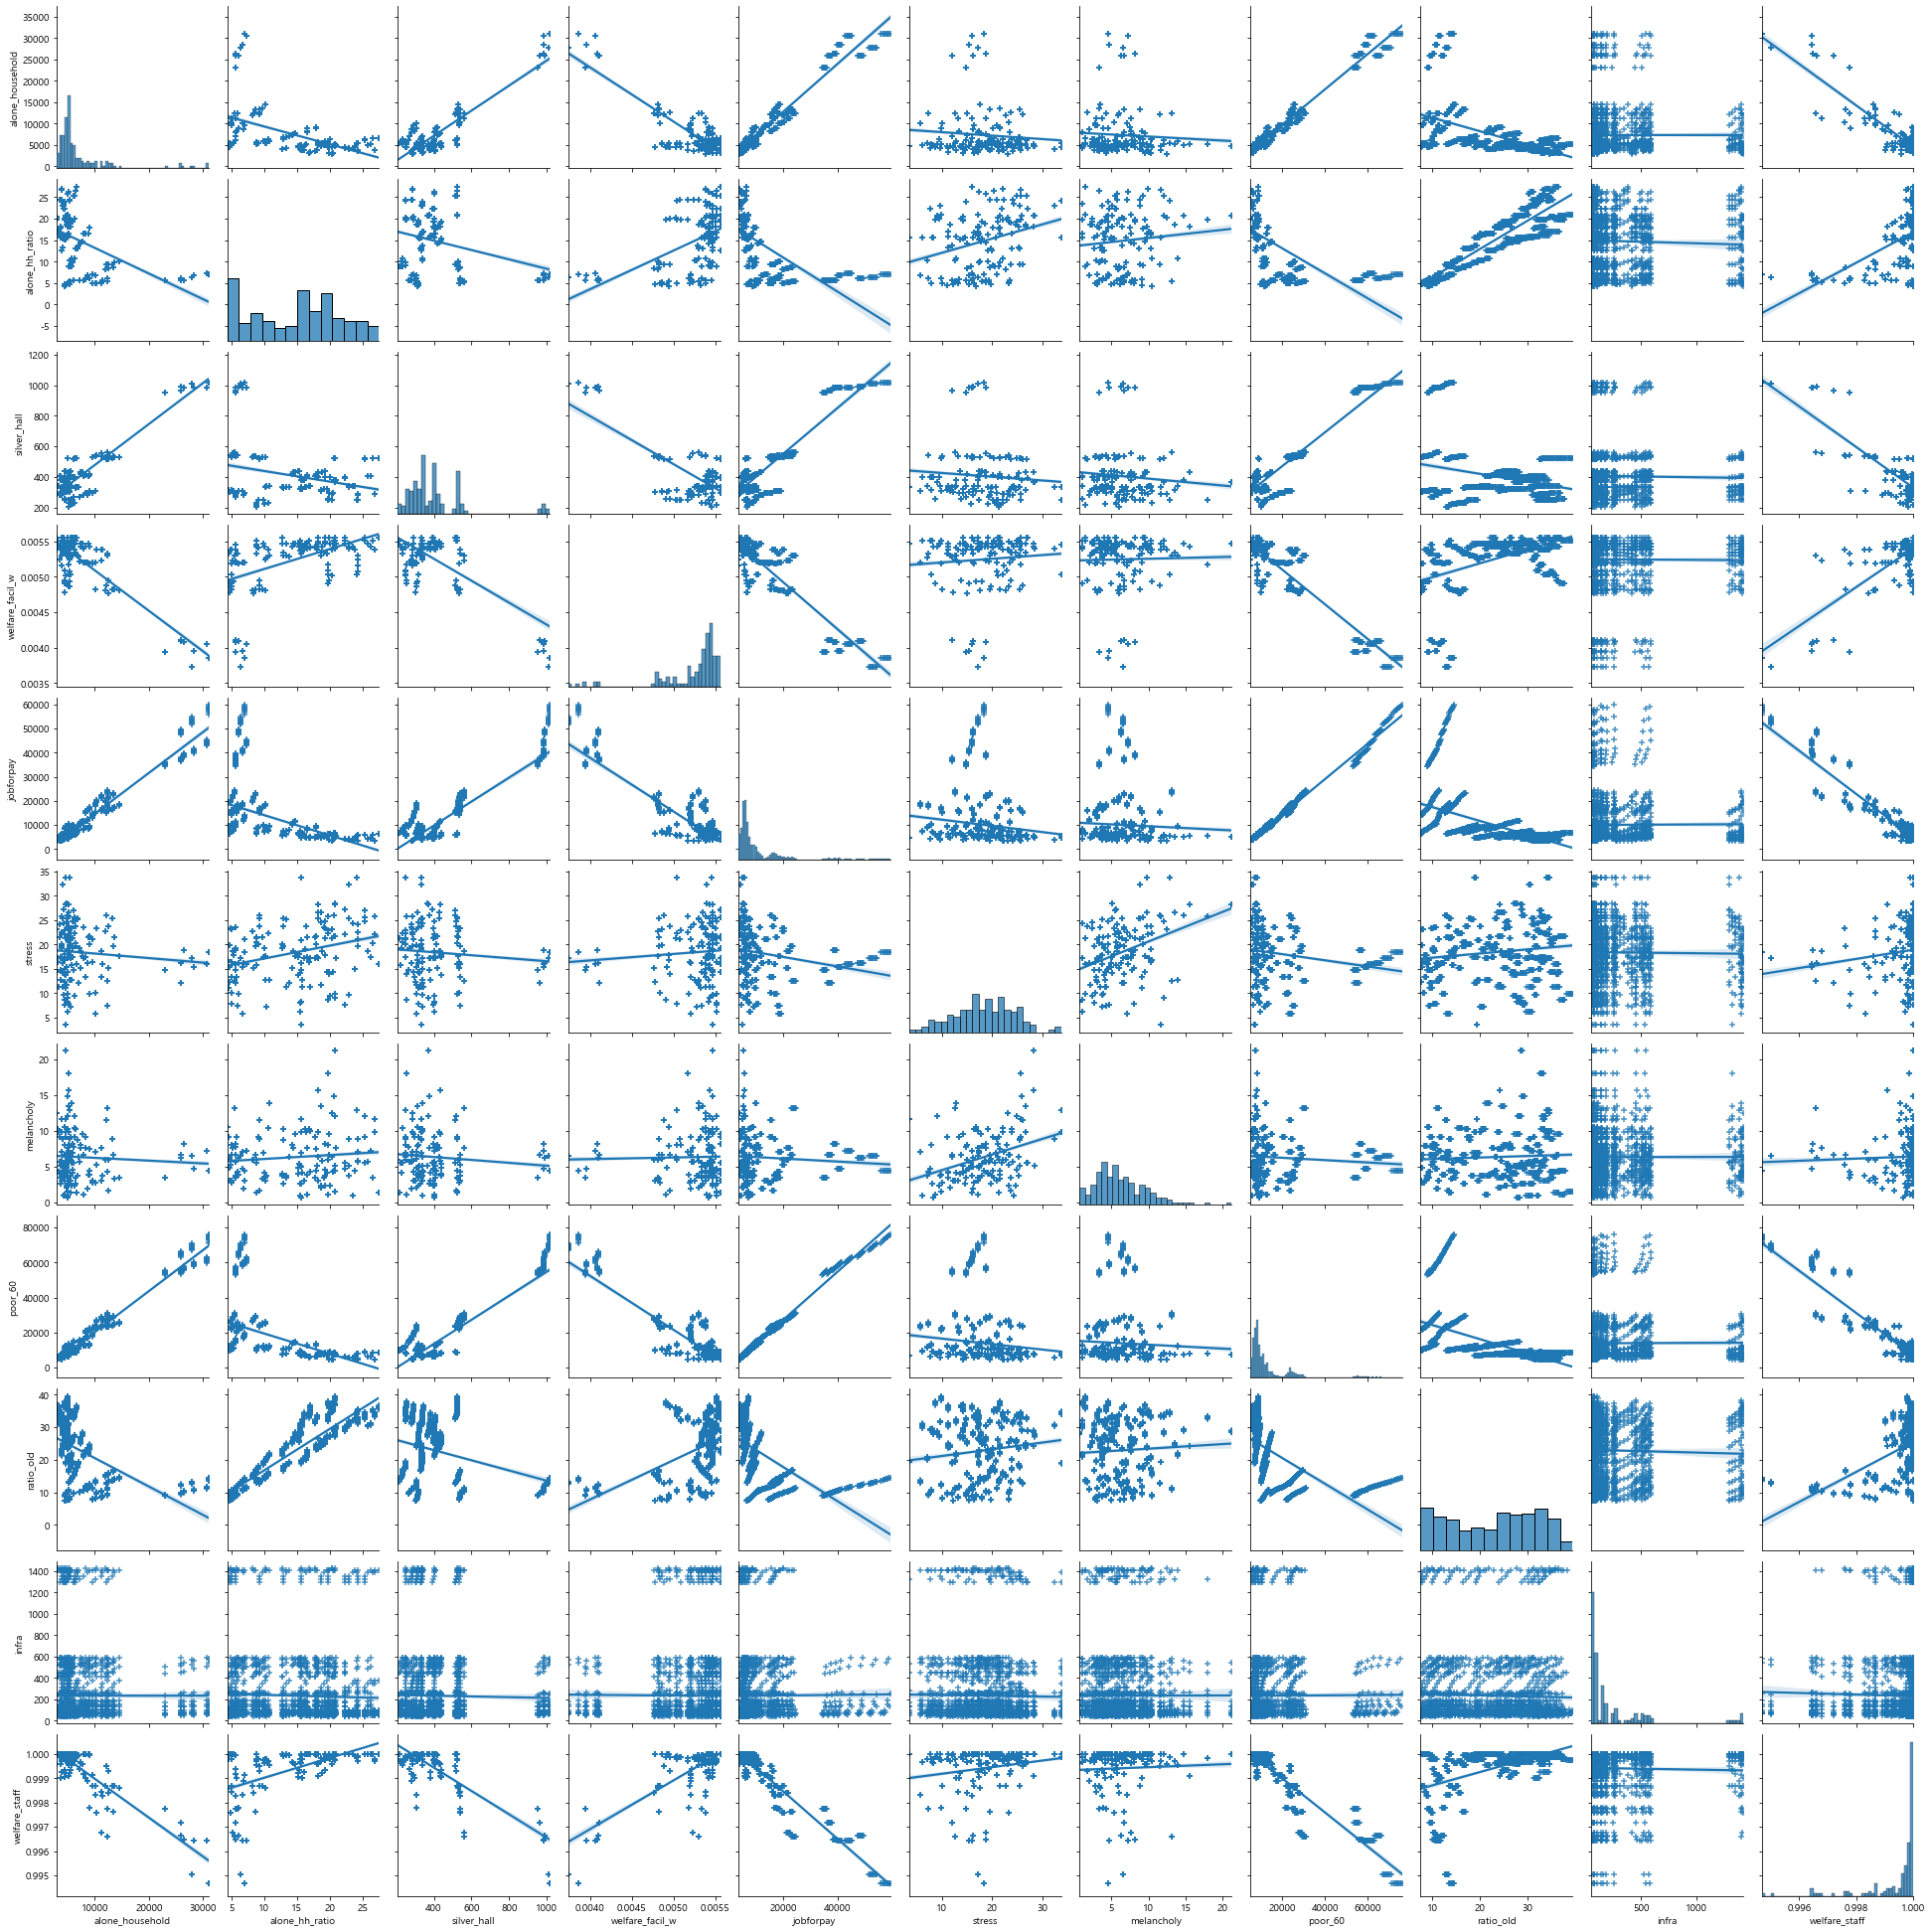

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df,kind='reg',markers='+')

## Case1. y=welfare_staff

In [5]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(df[df.columns.difference(['welfare_staff',"alone_hh_ratio"]) ])
std_df = pd.DataFrame(std_df, index=df[df.columns.difference(['welfare_staff',"alone_hh_ratio"])].index, 
columns=df[df.columns.difference(['welfare_staff',"alone_hh_ratio"])].columns)
std_df.head()

,alone_household,infra,jobforpay,melancholy,poor_60,ratio_old,silver_hall,stress,welfare_facil_w
0,0.889008,0.646985,0.519054,1.45985,0.700293,-1.117329,0.656856,1.293084,-0.988856
1,0.889008,-0.212244,0.523872,1.45985,0.705735,-1.117329,0.656856,1.293084,-0.988856
2,0.889008,-0.326808,0.529463,1.45985,0.712049,-1.106476,0.656856,1.293084,-0.988856
3,0.889008,0.869748,0.534685,1.45985,0.717947,-1.106476,0.656856,1.293084,-0.988856
4,0.889008,-0.314078,0.540092,1.45985,0.724054,-1.106476,0.656856,1.293084,-0.988856


In [6]:
std_df=pd.concat([std_df,df[['welfare_staff',"alone_hh_ratio"]]],axis=1)
std_df

,alone_household,infra,jobforpay,melancholy,poor_60,ratio_old,silver_hall,stress,welfare_facil_w,welfare_staff,alone_hh_ratio
0,0.889008,0.646985,0.519054,1.459850,0.700293,-1.117329,0.656856,1.293084,-0.988856,0.999506,9.262183
1,0.889008,-0.212244,0.523872,1.459850,0.705735,-1.117329,0.656856,1.293084,-0.988856,0.999506,9.262183
2,0.889008,-0.326808,0.529463,1.459850,0.712049,-1.106476,0.656856,1.293084,-0.988856,0.999506,9.262183
3,0.889008,0.869748,0.534685,1.459850,0.717947,-1.106476,0.656856,1.293084,-0.988856,0.999506,9.262183
4,0.889008,-0.314078,0.540092,1.459850,0.724054,-1.106476,0.656856,1.293084,-0.988856,0.999506,9.262183
...,...,...,...,...,...,...,...,...,...,...,...
1723,-0.404958,-0.501836,-0.327426,-1.367186,-0.395305,1.769530,0.716775,-1.450691,0.715974,0.999772,20.844153
1724,-0.404958,-0.517747,-0.326523,-1.367186,-0.394461,1.791235,0.716775,-1.450691,0.715974,0.999772,20.844153
1725,-0.404958,-0.533659,-0.325702,-1.367186,-0.393694,1.791235,0.716775,-1.450691,0.715974,0.999772,20.844153
1726,-0.404958,-0.435007,-0.325003,-1.367186,-0.393042,1.802088,0.716775,-1.450691,0.715974,0.999772,20.844153


In [20]:
X=std_df[std_df.columns.difference(["alone_household","welfare_staff","alone_hh_ratio"])]
Y=std_df["welfare_staff"]

In [21]:
X

,infra,jobforpay,melancholy,poor_60,ratio_old,silver_hall,stress,welfare_facil_w
0,0.646985,0.519054,1.459850,0.700293,-1.117329,0.656856,1.293084,-0.988856
1,-0.212244,0.523872,1.459850,0.705735,-1.117329,0.656856,1.293084,-0.988856
2,-0.326808,0.529463,1.459850,0.712049,-1.106476,0.656856,1.293084,-0.988856
3,0.869748,0.534685,1.459850,0.717947,-1.106476,0.656856,1.293084,-0.988856
4,-0.314078,0.540092,1.459850,0.724054,-1.106476,0.656856,1.293084,-0.988856
...,...,...,...,...,...,...,...,...
1723,-0.501836,-0.327426,-1.367186,-0.395305,1.769530,0.716775,-1.450691,0.715974
1724,-0.517747,-0.326523,-1.367186,-0.394461,1.791235,0.716775,-1.450691,0.715974
1725,-0.533659,-0.325702,-1.367186,-0.393694,1.791235,0.716775,-1.450691,0.715974
1726,-0.435007,-0.325003,-1.367186,-0.393042,1.802088,0.716775,-1.450691,0.715974


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1209, 8), (519, 8), (1209,), (519,))

In [23]:
param_value = {
    'alpha_1':[1e-05, 0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 8, 10, 20, 100, 1000, 5000],
    'lambda_1':[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 100],
    }
model = BayesianRidge()
grid = GridSearchCV(model,param_grid = param_value,cv=3) # 교차검증, 파라미터 값 찾기
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-05, 0.0001, 0.0005, 0.001, 0.01, 0.1, 1,
                                     2, 3, 4, 5, 6, 8, 10, 20, 100, 1000,
                                     5000],
                         'lambda_1': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                      0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 100]})

In [24]:
grid.estimator.get_params().keys()

dict_keys(['alpha_1', 'alpha_2', 'alpha_init', 'compute_score', 'copy_X', 'fit_intercept', 'lambda_1', 'lambda_2', 'lambda_init', 'n_iter', 'normalize', 'tol', 'verbose'])

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.8925190887403005
{'alpha_1': 1000, 'lambda_1': 1}


In [26]:
model = BayesianRidge(alpha_1=1000, lambda_1=1)
model.fit(X_train, y_train)
y_pred_staff = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred_staff)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_pred_staff)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 0.00036208812563953355
R^2: 0.865981540231824


## Case2. y=alone_hh_ratio

In [28]:
Y = std_df["alone_hh_ratio"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1209, 8), (519, 8), (1209,), (519,))

In [30]:
param_value = {
    'alpha_1':[1e-05, 0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 8, 10, 20, 100, 1000, 5000],
    'lambda_1':[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 100],
    }
model = BayesianRidge()
grid = GridSearchCV(model,param_grid = param_value,cv=3) # 교차검증, 파라미터 값 찾기
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-05, 0.0001, 0.0005, 0.001, 0.01, 0.1, 1,
                                     2, 3, 4, 5, 6, 8, 10, 20, 100, 1000,
                                     5000],
                         'lambda_1': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                      0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 100]})

In [31]:
print(grid.best_score_)
print(grid.best_params_)

0.888208424070286
{'alpha_1': 1000, 'lambda_1': 1}


In [33]:
model = BayesianRidge(alpha_1=1000, lambda_1=1)
model.fit(X_train, y_train)
y_pred_alone = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred_alone)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_pred_alone)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 2.197420558746489
R^2: 0.8853528040548934
